In [2]:
"""The jupyter notebooks were used for testing and to create the graphs shown in the paper for the clean 
code please see the Results Maker.py file
"""

'The jupyter notebooks were used for testing and to create the graphs shown in the paper for the clean \ncode please see the Results Maker.py file\n'

In [8]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score,  mean_squared_error



import tensorflow as tf




In [9]:
from warnings import simplefilter

# used to ignore tensor flow warnings
simplefilter(action='ignore')

# Data Analysis

In [10]:
#Importing the CSV Files
trainData = pd.read_csv("TrainingDataMulti.csv", sep=",",header=None)
testData = pd.read_csv("TestingDataMulti.csv", sep=",",header=None)

In [11]:
#Converting CSV to dataframe
df_train = pd.DataFrame(data = trainData)
df_test = pd.DataFrame(data = testData)

In [5]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.iloc[:,:-1]

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,116.889120,131860.3269,-3.076783,131810.1804,-123.094253,131910.4735,114.780635,376.10794,-5.254023,374.82617,...,0,0,0,0,0,0,0,0,0,0
5996,116.849013,131810.1804,-3.116890,131760.0339,-123.128630,131885.4002,114.769176,376.29105,-5.322778,374.82617,...,0,0,0,0,0,0,0,0,0,0
5997,116.384917,131734.9606,-3.586716,131684.8140,-123.586996,131785.1071,114.299351,376.47416,-5.849899,374.82617,...,0,0,0,0,0,0,0,0,0,0
5998,111.125164,130506.3704,-8.846468,130456.2238,-128.858208,130556.5169,106.667553,478.83265,-13.464508,477.73399,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_train.iloc[:,-1]

0       0
1       0
2       0
3       0
4       0
       ..
5995    0
5996    0
5997    0
5998    0
5999    0
Name: 128, Length: 6000, dtype: int64

In [8]:
df_train.iloc[:,-1].value_counts() #Checking to see if dataset is balanced

0    3000
2    1500
1    1500
Name: 128, dtype: int64

# Algorithm Testing

In [ ]:
#This section was once again used for quick testing of classification algorithms by hot swapping the classifiers in the pipe lines

In [13]:
#Splitting train data into train and test set
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=42)

In [16]:
#Testing Extra Trees
pipe = ExtraTreesClassifier( criterion= 'entropy' ,max_depth=None, max_features = None )
pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

0.9533333333333334

In [10]:

#Testing Gradient Descent
pipe = make_pipeline(StandardScaler(), SGDClassifier())
pipe.fit(X_train, y_train)


SGD_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(SGD_accuracy)) 

Test set accuracy: 0.69


In [11]:
#Testing support vector classifier
pipe = make_pipeline(StandardScaler(), SVC(kernel='poly'))
pipe.fit(X_train, y_train)


SVM_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(SVM_accuracy)) 

Test set accuracy: 0.64


In [12]:
#testing regression classifer
pipe = make_pipeline(StandardScaler(),LogisticRegression(C=100, max_iter=1000))
pipe.fit(X_train, y_train)


LG_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(LG_accuracy)) 

Test set accuracy: 0.72


In [13]:
#Testing decision tree classifer
pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier())
pipe.fit(X_train, y_train)


DT_accuracy = pipe.score(X_test, y_test)
pipe
print("Test set accuracy: {:.2f}".format(DT_accuracy)) 

Test set accuracy: 0.90


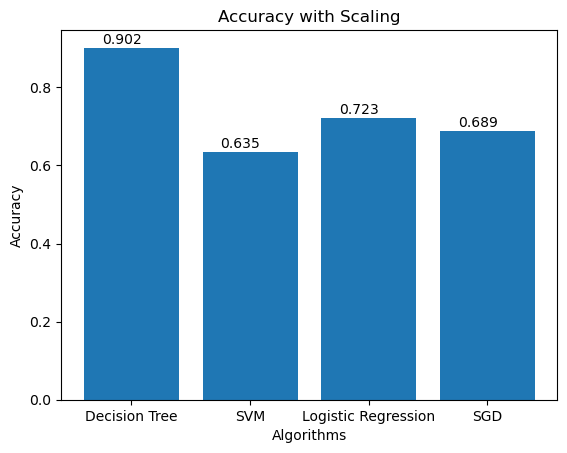

In [14]:
#initial graphing
x_axis = ['Decision Tree', 'SVM', 'Logistic Regression', 'SGD']
y_axis = [DT_accuracy, SVM_accuracy, LG_accuracy, SGD_accuracy]

plt.bar(x_axis, y_axis)
plt.title('Accuracy with Scaling')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
for i, v in enumerate(y_axis):
    plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
plt.show()

# K Fold Averages and Graphing Results

In [9]:
#Same K fold function taken from binary testing
def kFoldAverages(num,scalar):
    SGD_accuracy =[]
    SVM_accuracy =[]
    LG_accuracy =[]
    DT_accuracy =[]
    RF_accuracy =[]
    ET_accuracy =[]
    BG_accuracy =[]
    kf = KFold(n_splits=num,shuffle=True)
    for i, (train_index, test_index) in enumerate(kf.split(df_train)):
        print(f"Fold {i}:")
#         print(f"  Train: index={train_index}") 
#         print(f"  Test:  index={test_index}")
        X_train=df_train.iloc[train_index,:-1]
        X_test=df_train.iloc[test_index,:-1]
        y_train=df_train.iloc[train_index,-1]
        y_test=df_train.iloc[test_index,-1]
        
        pipe = make_pipeline(scalar(), SGDClassifier())
        pipe.fit(X_train, y_train)
        SGD_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(scalar(), SVC(kernel='linear'))
        pipe.fit(X_train, y_train)
        SVM_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(scalar(),LogisticRegression(C=100, max_iter=1000))
        pipe.fit(X_train, y_train)
        LG_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(scalar(),DecisionTreeClassifier())
        pipe.fit(X_train, y_train)
        DT_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(scalar(),RandomForestClassifier())
        pipe.fit(X_train, y_train)
        RF_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(scalar(),ExtraTreesClassifier())
        pipe.fit(X_train, y_train)
        ET_accuracy.append(pipe.score(X_test, y_test)) 
        
        bag_clf = BaggingClassifier(
            DecisionTreeClassifier(), n_estimators=500,
            max_samples=1000, bootstrap=True, n_jobs=-1, max_features = 0.1
        )
        bag_clf.fit(X_train, y_train)
        BG_accuracy.append(bag_clf.score(X_test, y_test))

    x_axis = ['Decision Tree','Random Forest','Extra Trees','Bagging Classifier' , 'SVM', 'Logistic Regression', 'SGD']
    y_axis = [DT_accuracy,RF_accuracy,ET_accuracy , BG_accuracy ,SVM_accuracy, LG_accuracy, SGD_accuracy]
    y_axis=[sum(y) / len(y) for y in y_axis]
    plt.bar(x_axis, y_axis)
    plt.title('Alogorithm Results')
    plt.ylabel('Accuracy')
    for i, v in enumerate(y_axis):
        plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
    plt.xticks(rotation=45)
    plt.show()

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:


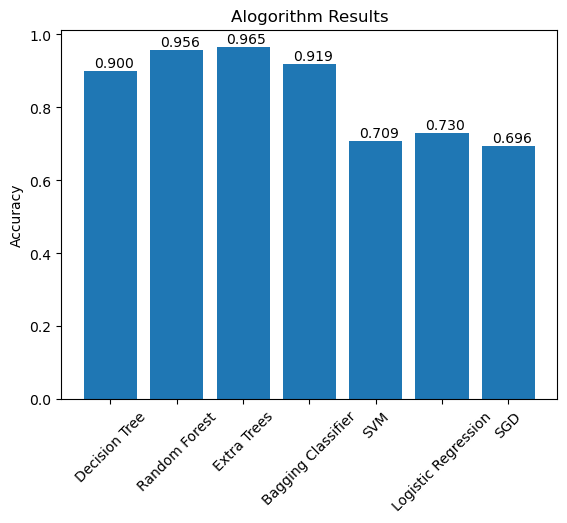

In [10]:
kFoldAverages(5,StandardScaler)

In [17]:
def kFoldBoxAverages(num,scalar):
    SGD_accuracy =[]
    SVM_accuracy =[]
    LG_accuracy =[]
    DT_accuracy =[]
    RF_accuracy = []
    kf = KFold(n_splits=num,shuffle=True)
    for i, (train_index, test_index) in enumerate(kf.split(df_train)):
#         print(f"Fold {i}:")
#         print(f"  Train: index={train_index}") 
#         print(f"  Test:  index={test_index}")
        X_train=df_train.iloc[train_index,:-1]
        X_test=df_train.iloc[test_index,:-1]
        y_train=df_train.iloc[train_index,-1]
        y_test=df_train.iloc[test_index,-1]
        
        pipe = make_pipeline(scalar(), SGDClassifier())
        pipe.fit(X_train, y_train)
        SGD_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(scalar(), SVC(kernel='poly'))
        pipe.fit(X_train, y_train)
        SVM_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),LogisticRegression(C=100, max_iter=1000))
        pipe.fit(X_train, y_train)
        LG_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier())
        pipe.fit(X_train, y_train)
        DT_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),RandomForestClassifier())
        pipe.fit(X_train, y_train)
        RF_accuracy.append(pipe.score(X_test, y_test)) 
                   

    
#     print("SGD Test set accuracy", SGD_accuracy) 
#     print("SVM Test set accuracy", SVM_accuracy) 
#     print("LG Test set accuracy", LG_accuracy) 
#     print("DT Test set accuracy", DT_accuracy) 
    plt.title('Accuracy with Scaling')
    plt.xlabel('Algorithms')
    plt.ylabel('Accuracy')
    plt.boxplot([DT_accuracy,RF_accuracy,SVM_accuracy,SGD_accuracy,LG_accuracy],labels= ['Decision Tree','Random Forest', 'SVM', 'Logistic Regression', 'SGD'])
    plt.show()

# Trying Additional Methods and Neural Networks

In [19]:
#testing of voting classifier
voting_clf = VotingClassifier(
        estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier())],
        voting='hard'
    )

pipe = make_pipeline(StandardScaler(),RandomForestClassifier())
pipe.fit(X_train, y_train)
                   

# Finally, we can evaluate the model's performance on the test set
DT_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(DT_accuracy))

Test set accuracy: 0.96


In [20]:
#trying to make my own random forest
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.1, random_state=10)


print("Test set accuracy: {:.2f}".format(DT_accuracy))

Test set accuracy: 0.96


In [21]:
#keras nueral net
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.1, random_state=10)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256, activation='relu', input_shape=(128,)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=80, validation_data=(X_test, y_test))





Epoch 1/80


2023-05-25 17:36:31.084287: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


169/169 [==============================] - 1s 2ms/step - loss: 0.7570 - accuracy: 0.6598 - val_loss: 0.6025 - val_accuracy: 0.7483
Epoch 2/80
169/169 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.7459 - val_loss: 0.5511 - val_accuracy: 0.7800
Epoch 3/80
169/169 [==============================] - 0s 1ms/step - loss: 0.5245 - accuracy: 0.7754 - val_loss: 0.5895 - val_accuracy: 0.7483
Epoch 4/80
169/169 [==============================] - 0s 1ms/step - loss: 0.4840 - accuracy: 0.7956 - val_loss: 0.4988 - val_accuracy: 0.7950
Epoch 5/80
169/169 [==============================] - 0s 1ms/step - loss: 0.4533 - accuracy: 0.8080 - val_loss: 0.4784 - val_accuracy: 0.8150
Epoch 6/80
169/169 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.8269 - val_loss: 0.4909 - val_accuracy: 0.8050
Epoch 7/80
169/169 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.8356 - val_loss: 0.4837 - val_accuracy: 0.8150
Epoch 8/80
169/16

In [22]:
#upgraded keras neural net
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.1, random_state=10)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='elu', input_shape=(128,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=256, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation='elu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=3, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))





Epoch 1/300
169/169 [==============================] - 1s 2ms/step - loss: 11.3477 - accuracy: 0.5919 - val_loss: 4.3551 - val_accuracy: 0.6417
Epoch 2/300
169/169 [==============================] - 0s 2ms/step - loss: 2.6045 - accuracy: 0.6519 - val_loss: 1.5403 - val_accuracy: 0.6467
Epoch 3/300
169/169 [==============================] - 0s 2ms/step - loss: 1.3876 - accuracy: 0.6719 - val_loss: 1.3000 - val_accuracy: 0.6667
Epoch 4/300
169/169 [==============================] - 0s 2ms/step - loss: 1.1668 - accuracy: 0.6789 - val_loss: 1.0579 - val_accuracy: 0.6833
Epoch 5/300
169/169 [==============================] - 0s 2ms/step - loss: 1.0809 - accuracy: 0.6844 - val_loss: 1.0973 - val_accuracy: 0.6950
Epoch 6/300
169/169 [==============================] - 0s 2ms/step - loss: 1.0201 - accuracy: 0.6926 - val_loss: 0.9656 - val_accuracy: 0.7033
Epoch 7/300
169/169 [==============================] - 0s 2ms/step - loss: 0.9655 - accuracy: 0.6976 - val_loss: 0.9015 - val_accuracy: 0.698

Epoch 58/300
169/169 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.7787 - val_loss: 0.6579 - val_accuracy: 0.8133
Epoch 59/300
169/169 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.7857 - val_loss: 0.6851 - val_accuracy: 0.8183
Epoch 60/300
169/169 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.7911 - val_loss: 0.6443 - val_accuracy: 0.8017
Epoch 61/300
169/169 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.7917 - val_loss: 0.6819 - val_accuracy: 0.8133
Epoch 62/300
169/169 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.7800 - val_loss: 0.6629 - val_accuracy: 0.8150
Epoch 63/300
169/169 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.7963 - val_loss: 0.6424 - val_accuracy: 0.8267
Epoch 64/300
169/169 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.7887 - val_loss: 0.6179 - val_accuracy:

Epoch 115/300
169/169 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.8267 - val_loss: 0.5618 - val_accuracy: 0.8500
Epoch 116/300
169/169 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.8281 - val_loss: 0.5611 - val_accuracy: 0.8533
Epoch 117/300
169/169 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.8219 - val_loss: 0.5721 - val_accuracy: 0.8550
Epoch 118/300
169/169 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.8257 - val_loss: 0.5683 - val_accuracy: 0.8517
Epoch 119/300
169/169 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.8269 - val_loss: 0.5744 - val_accuracy: 0.8467
Epoch 120/300
169/169 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.8241 - val_loss: 0.5866 - val_accuracy: 0.8333
Epoch 121/300
169/169 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.8215 - val_loss: 0.5620 - val_ac

169/169 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.8594 - val_loss: 0.4975 - val_accuracy: 0.8667
Epoch 228/300
169/169 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.8611 - val_loss: 0.5227 - val_accuracy: 0.8550
Epoch 229/300
169/169 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.8567 - val_loss: 0.5329 - val_accuracy: 0.8683
Epoch 230/300
169/169 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.8548 - val_loss: 0.4978 - val_accuracy: 0.8600
Epoch 231/300
169/169 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.8554 - val_loss: 0.5124 - val_accuracy: 0.8733
Epoch 232/300
169/169 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.8544 - val_loss: 0.5054 - val_accuracy: 0.8667
Epoch 233/300
169/169 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.8596 - val_loss: 0.5360 - val_accuracy: 0.8767

KeyboardInterrupt: 

In [ ]:
#large keras neural net
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.1, random_state=None)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='elu', input_shape=(128,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=512, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=512, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=3, activation='softmax')
])



model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))


In [ ]:
model.evaluate(X_test, y_test)

In [7]:
#testing ada boost
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=10)
param_grid = {
    'n_estimators': [50, 100, 200,300,400],  
    'learning_rate': [0.1,0.2,0.3, 0.5, 1.0]  
}

adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())


grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)


print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.5, 'n_estimators': 300}
Best Score:  0.8791666666666667


Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:


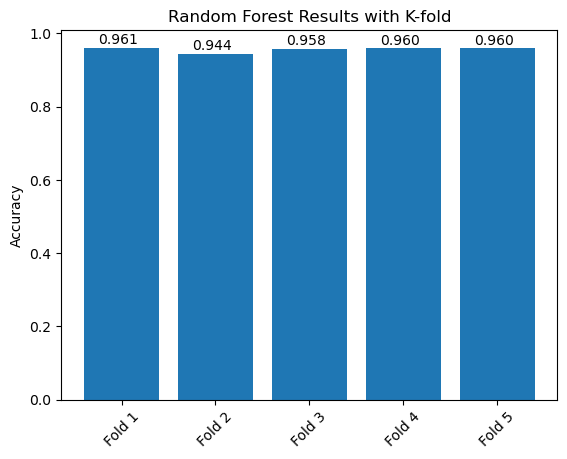

In [15]:
kFoldForest(5)

# Tuning

In [26]:
#grid search for best parameters
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=42)
param_grid = {
    'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5, 10], 
    'criterion' : ['gini','entropy'],
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [None, 'sqrt', 'log2']  
}


print("Starting Search")
grid_search = GridSearchCV(ExtraTreesClassifier() , param_grid, cv=5)
grid_search.fit(X_train, y_train)


print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_


best_model.score(X_test,y_test)

Starting Search
Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score:  0.960625


0.9566666666666667

# Results

In [104]:
#Getting scores for table
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=None)
ETC = ExtraTreesClassifier( criterion= 'gini' ,max_depth=None, max_features = 'log2', min_samples_leaf = 1, min_samples_split=2)
ETC.fit(X_train,y_train)
accuracy = ETC.score(X_test, y_test)
print("Accuracy:", accuracy)


y_preds = ETC.predict(X_test)


precision = precision_score(y_test, y_preds, average='weighted')
print("Precision:", precision)


recall = recall_score(y_test, y_preds, average='weighted')
print("Recall:", recall)


f1 = f1_score(y_test, y_preds, average='weighted')
print("F1-score:", f1)

Accuracy: 0.9666666666666667
Precision: 0.9665693099273608
Recall: 0.9666666666666667
F1-score: 0.9666088271953697


In [ ]:
def kFoldForest(clf,num):
    
    RF_accuracy =[]
    kf = KFold(n_splits=num,shuffle=True)
    for i, (train_index, test_index) in enumerate(kf.split(df_train)):
        print(f"Fold {i}:")
#         print(f"  Train: index={train_index}") 
#         print(f"  Test:  index={test_index}")
        X_train=df_train.iloc[train_index,:-1]
        X_test=df_train.iloc[test_index,:-1]
        y_train=df_train.iloc[train_index,-1]
        y_test=df_train.iloc[test_index,-1]
        
        
        pipe = RandomForestClassifier()
        pipe.fit(X_train, y_train)
        RF_accuracy.append(pipe.score(X_test, y_test)) 
        
    
    
    x_axis = ["Fold "+ str(i+1) for i in range(len(RF_accuracy))]
    y_axis = RF_accuracy
    plt.bar(x_axis, y_axis)
    plt.title('Random Forest Results with K-fold')
    plt.ylabel('Accuracy')
    for i, v in enumerate(y_axis):
        plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
    plt.xticks(rotation=45)
    plt.show()

# Predictions

In [117]:
X_train=df_train.iloc[:,:-1]
y_train=df_train.iloc[:,-1]


In [118]:
X_test=pd.DataFrame(data = testData)

In [119]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
ETC = ExtraTreesClassifier( criterion= 'gini' ,max_depth=None, max_features = 'log2', min_samples_leaf = 1, min_samples_split=2)

ETC.fit(X_train, y_train)
print(ETC.score(X_train,y_train))

1.0


In [120]:
preds = ETC.predict(X_test)

In [121]:
preds

array([2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [122]:
pd.DataFrame(preds).to_csv('TestingResultsMulti.csv', index=False, header=False)

In [96]:
pps = ETC.predict_proba(X_test)

In [97]:
con = []
for y in pps:
    con.append(max(y))
avgCon = sum(con) / len(con)
print(con,sep=' ')
print("average confindence",avgCon)

[0.88, 0.99, 1.0, 0.93, 0.93, 0.79, 0.81, 0.5, 1.0, 1.0, 0.99, 0.87, 0.98, 0.91, 0.96, 0.99, 0.89, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 0.89, 0.9, 1.0, 0.87, 0.96, 0.97, 1.0, 0.99, 0.54, 1.0, 1.0, 0.85, 0.88, 1.0, 1.0, 0.99, 0.82, 0.49, 1.0, 1.0, 0.96, 0.97, 1.0, 0.99, 0.95, 0.99, 1.0, 0.98, 1.0, 0.46, 1.0, 0.68, 0.99, 0.8, 1.0, 1.0, 0.99, 0.97, 1.0, 0.97, 0.96, 0.98, 0.45, 0.54, 1.0, 0.71, 1.0, 0.96, 0.98, 0.95, 1.0, 0.62, 1.0, 0.97, 0.93, 1.0, 0.9, 0.85, 0.93, 0.99, 0.94, 0.99, 0.49, 0.95, 0.98, 1.0, 0.99, 1.0, 0.91, 0.99, 1.0, 1.0, 0.68, 0.99, 1.0, 1.0, 0.99, 1.0, 0.98, 1.0, 0.72, 0.79, 0.95, 1.0, 0.47, 1.0, 0.98, 0.99, 0.97, 0.98, 1.0, 1.0, 1.0, 0.99, 1.0, 0.88, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 0.97, 1.0, 1.0, 0.92, 0.96, 1.0, 1.0, 1.0, 1.0, 0.98, 0.98, 0.98, 0.96, 1.0, 1.0, 0.85, 1.0, 1.0, 1.0, 1.0, 0.85, 1.0, 0.92, 1.0, 0.52, 0.98, 0.75, 0.96, 0.75, 0.65, 1.0, 0.65, 0.76, 0.94, 1.0, 0.92, 1.0, 0.5, 0.95, 1.0, 0.99, 0.51, 0.94, 0.7, 0.93, 1.0, 0.91, 0.95, 0.75, 0.71, 0.99, 1.0, 0.71, 0.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=None)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pipe = ETC
pipe.fit(X_train, y_train)



DT_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(DT_accuracy)) 
pps =pipe.predict_proba(X_test)

con = []
for y in pps:
    con.append(max(y))
        
avgCon = sum(con) / len(con)
print(con,sep=' ')
print("average confindence",avgCon)

Test set accuracy: 0.97
[0.88, 0.99, 1.0, 0.93, 0.93, 0.79, 0.81, 0.5, 1.0, 1.0, 0.99, 0.87, 0.98, 0.91, 0.96, 0.99, 0.89, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 0.89, 0.9, 1.0, 0.87, 0.96, 0.97, 1.0, 0.99, 0.54, 1.0, 1.0, 0.85, 0.88, 1.0, 1.0, 0.99, 0.82, 0.49, 1.0, 1.0, 0.96, 0.97, 1.0, 0.99, 0.95, 0.99, 1.0, 0.98, 1.0, 0.46, 1.0, 0.68, 0.99, 0.8, 1.0, 1.0, 0.99, 0.97, 1.0, 0.97, 0.96, 0.98, 0.45, 0.54, 1.0, 0.71, 1.0, 0.96, 0.98, 0.95, 1.0, 0.62, 1.0, 0.97, 0.93, 1.0, 0.9, 0.85, 0.93, 0.99, 0.94, 0.99, 0.49, 0.95, 0.98, 1.0, 0.99, 1.0, 0.91, 0.99, 1.0, 1.0, 0.68, 0.99, 1.0, 1.0, 0.99, 1.0, 0.98, 1.0, 0.72, 0.79, 0.95, 1.0, 0.47, 1.0, 0.98, 0.99, 0.97, 0.98, 1.0, 1.0, 1.0, 0.99, 1.0, 0.88, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 0.97, 1.0, 1.0, 0.92, 0.96, 1.0, 1.0, 1.0, 1.0, 0.98, 0.98, 0.98, 0.96, 1.0, 1.0, 0.85, 1.0, 1.0, 1.0, 1.0, 0.85, 1.0, 0.92, 1.0, 0.52, 0.98, 0.75, 0.96, 0.75, 0.65, 1.0, 0.65, 0.76, 0.94, 1.0, 0.92, 1.0, 0.5, 0.95, 1.0, 0.99, 0.51, 0.94, 0.7, 0.93, 1.0, 0.91, 0.95, 0.75, 0

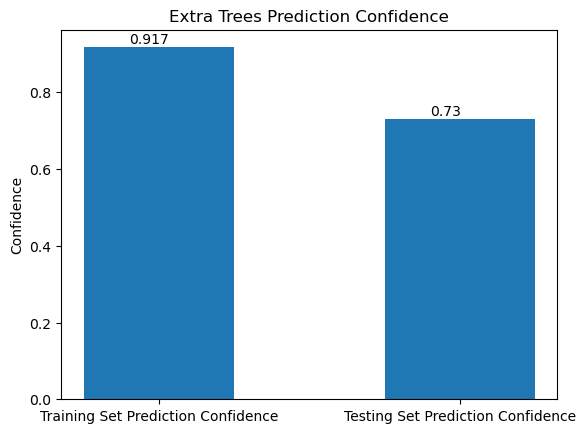

In [3]:
x_axis = ["Training Set Prediction Confidence", "Testing Set Prediction Confidence"]
y_axis = [0.917,0.73]
plt.bar(x_axis, y_axis, width = 0.5)
plt.title('Extra Trees Prediction Confidence')
plt.ylabel('Confidence')
for i, v in enumerate(y_axis):
    plt.text(i-0.1, v+0.01, "{:.3}".format(v))
plt.show()